# FEgrow: An Open-Source Molecular Builder and Free Energy Preparation Workflow

**Authors: Mateusz K Bieniek, Ben Cree, Rachael Pirie, Joshua T. Horton, Natalie J. Tatum, Daniel J. Cole**

## Overview

Building and scoring molecules can be further streamlined by employing our established protocol. Here we show how to quickly build a library and score the entire library. 

In [1]:
import pandas as pd
import prody
from rdkit import Chem
from crem.crem import mutate_mol, grow_mol, link_mols

import fegrow
from fegrow import ChemSpace

from fegrow.testing import core_5R83_path, rec_5R83_path, data_5R83_path

# Prepare the ligand template

In [2]:
#!grep "XEY" 7l10.pdb > in.pdb
!obabel -isdf core.sdf -osdf -O core-H.sdf -p 7

1 molecule converted


In [3]:
scaffold = Chem.SDMolSupplier('core-H.sdf')[0]

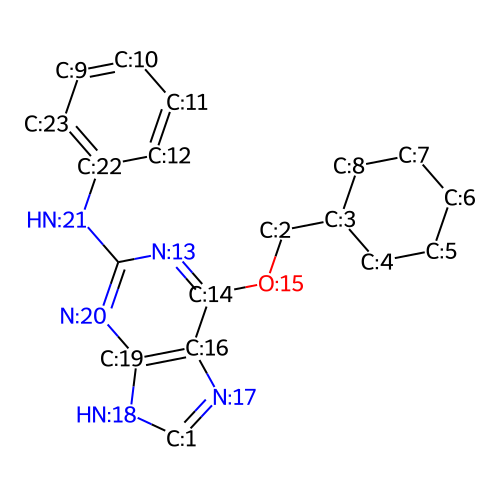

In [4]:
toview = fegrow.RMol(scaffold)
toview.rep2D(idx=True, size=(500, 500))

In [5]:
with open('smiles.txt') as f:
    mols = f.read().splitlines()

In [6]:
len(mols)

16

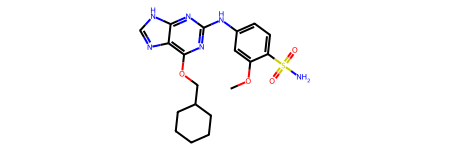

In [7]:
Chem.MolFromSmiles(mols[14])

As we are using already prepared Smiles that have the scaffold as a substructure, it is not needed to set any growing vector. 

In [8]:
pattern = scaffold

for i in range(len(mols)):
    mol = Chem.MolFromSmiles(mols[i])
    if mol.HasSubstructMatch(pattern) == False:
        print(i, mols[i])

In [9]:
from dask.distributed import LocalCluster
lc = LocalCluster(processes=True, n_workers=None, threads_per_worker=1)

2025-11-25 14:10:47,687 - distributed.nanny - WARNING - Restarting worker
2025-11-25 14:10:47,765 - distributed.nanny - WARNING - Restarting worker
2025-11-25 14:11:11,178 - distributed.nanny - WARNING - Restarting worker
2025-11-25 14:11:33,019 - distributed.nanny - WARNING - Restarting worker
2025-11-25 14:11:47,861 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38533' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {'_evaluate_atomic-196238a1-15c9-47e7-b3c1-ba8af2e87e28'} (stimulus_id='handle-worker-cleanup-1764079907.8609219')
2025-11-25 14:11:47,873 - distributed.nanny - WARNING - Restarting worker
2025-11-25 14:13:16,164 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43313' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {'float-ea7eb806-5c93-4a42-9f5f-9cf503e6ff6e', 'int-77b5ce20-207e-46ab-8120-416e80e0373a', 'Mol-d1693397-4921-4765-a55b-6eae564a77e5', 's

In [10]:
# create the chemical space
cs = ChemSpace(dask_cluster=lc)
cs

Dask can be watched on http://127.0.0.1:8787/status


,Smiles,score,h,Training,Success,enamine_searched,enamine_id,2D


In [11]:
#cs._dask_cluster

In [12]:
# we're not growing the scaffold, we're superimposing bigger molecules on it
cs.add_scaffold(scaffold)

/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/fegrow/package.py:799: UserWarning: The template does not have an attachement (Atoms with index 0, or in case of Smiles the * character. )
  warnings.warn("The template does not have an attachement (Atoms with index 0, "


In [13]:
# get the protein-ligand complex structure
#!wget -nc https://files.rcsb.org/download/3vf6.pdb

# load the complex with the ligand
sys = prody.parsePDB('apodock-prediction-9.pdb')

# remove any unwanted molecules
rec = sys.select('not (nucleic or hetatm or water)')

# save the processed protein
prody.writePDB('rec.pdb', rec)

# fix the receptor file (missing residues, protonation, etc)
fegrow.fix_receptor("rec.pdb", "rec_final.pdb")

# load back into prody
#rec_final = prody.parsePDB("rec_final.pdb")
#rec_final = prody.parsePDB("out.pdb")

# fix the receptor file (missing residues, protonation, etc)
##fegrow.fix_receptor("7t79-H-prep.pdb", "rec_final.pdb")

# load back into prody
##rec_final = prody.parsePDB("rec_final.pdb")

#!grep "ATOM" ../structures/7t79-H.pdb > rec_final.pdb
#cs.add_protein(rec_5R83_path)
cs.add_protein('rec_final.pdb')

,Smiles,score,h,Training,Success,enamine_searched,enamine_id,2D
0,Brc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<NA>,<NA>,False,NaN,False,NaN,
1,C(N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<NA>,<NA>,False,NaN,False,NaN,
2,C(Sc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<NA>,<NA>,False,NaN,False,NaN,
3,C(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<NA>,<NA>,False,NaN,False,NaN,
4,Clc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<NA>,<NA>,False,NaN,False,NaN,
5,N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<NA>,<NA>,False,NaN,False,NaN,
6,C(Oc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<NA>,<NA>,False,NaN,False,NaN,
7,N(C(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H]...,<NA>,<NA>,False,NaN,False,NaN,
8,N(S(=O)(=O)c1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<NA>,<NA>,False,NaN,False,NaN,
9,C([S@](=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])...,<NA>,<NA>,False,NaN,False,NaN,

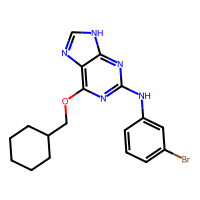
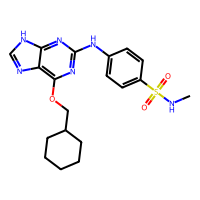
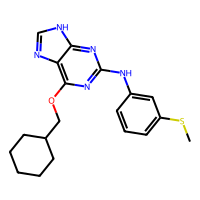
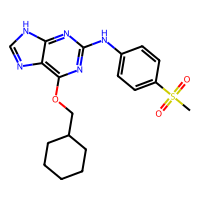
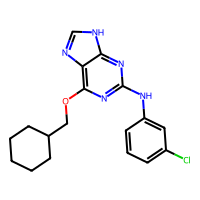
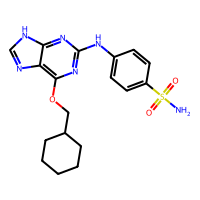
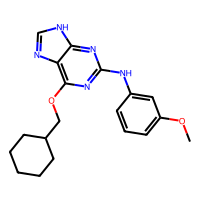
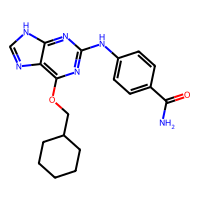
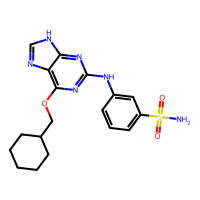
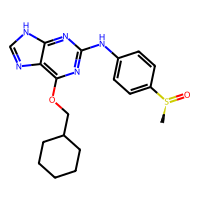
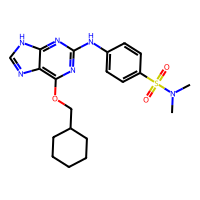
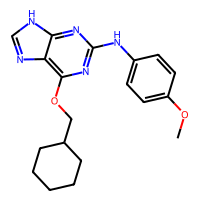
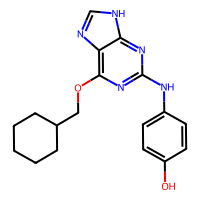
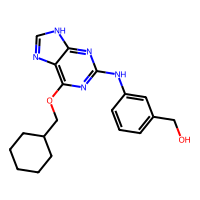
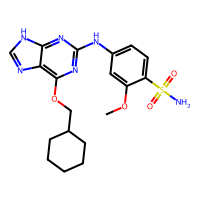
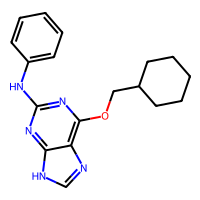

In [14]:
# load 50k Smiles
#smiles = pd.read_csv('csv/arthor-hits-2024Mar26-0918.csv',
#                     names=["Smiles", "??", "db"],
#                     index_col=0).Smiles

#smiles = pd.read_csv('smiles.csv').Smiles.to_list()


# take all 20000
#smiles = smiles.apply(lambda r: r.split()[0])
smiles = mols[0:]

# here we add Smiles which should already have been matched
# to the scaffold (rdkit Mol.HasSubstructureMatch)
#cs.add_smiles(smiles.to_list(), protonate=True)
cs.add_smiles(smiles, protonate=True)
cs

In [15]:
smiles

['Brc1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'CNS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'CSc1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'CS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'Clc1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'NS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'COc1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'NC(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'NS(=O)(=O)c1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'C[S@](=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'CN(C)S(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'COc1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'Oc1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1',
 'OCc1cccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)c1',
 'COc1cc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)ccc1S(N)(=O)=O',
 'c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1']

In [16]:
cs.evaluate(num_conf=200, gnina_gpu=False, penalty=0.0, al_ignore_penalty=False)

/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value

/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /h

Generated 1 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/1 [00:00<?, ?it/s]

Generated 1 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 1/1 [00:02<00:00,  2.94s/it]
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libt

Generated 1 conformers. 
Removed 0 conformers. 
Using force field


Optimising conformer:   0%|                               | 0/1 [00:00<?, ?it/s]/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")
Optimising conformer: 100%|███████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Generated 1 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/1 [00:00<?, ?it/s]/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libti

Generated 4 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 1/1 [00:02<00:00,  2.36s/it]
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")
/bin/bash: /home/campus.ncl.ac.uk/c2049423/an

Generated 2 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 4/4 [00:08<00:00,  2.07s/it]
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libt

Generated 2 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'
Generated 1 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'
Generated 3 conformers. 
Removed 1 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/2 [00:00<?, ?it/s]/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Optimising conformer:  50%|███████████▌           | 1/2 [00:02<00:02,  2.39s/it]/bin/bash: /home/campus.ncl.ac

Generated 6 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/6 [00:00<?, ?it/s]/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fe

Generated 4 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/2 [00:00<?, ?it/s]

Generated 9 conformers. 
Removed 7 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 4/4 [00:09<00:00,  2.28s/it]
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information av

Generated 2 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 2/2 [00:03<00:00,  1.82s/it]
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.asanyarray(value, dtype=np.float64)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin

Generated 5 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:  20%|████▌                  | 1/5 [00:02<00:09,  2.42s/it]/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Optimising conformer:  40%|█████████▏             | 2/5 [00:04<00:06,  2.22s/it]

Generated 1 conformers. 
Removed 0 conformers. 
Using force field


Optimising conformer: 100%|███████████████████████| 5/5 [00:11<00:00,  2.37s/it]
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be availabl

Generated 1 conformers. 
Removed 0 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 1/1 [00:02<00:00,  2.06s/it]
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be availabl

Generated 12 conformers. 
Removed 9 conformers. 
using ani2x
/home/campus.ncl.ac.uk/c2049423/anaconda3/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 3/3 [00:06<00:00,  2.19s/it]


,Smiles,Mol,score,h,Training,Success,enamine_searched,enamine_id
0,Brc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<fegrow.package.RMol object at 0x7052441dac50>,7.045,<NA>,True,True,False,NaN
1,C(N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<fegrow.package.RMol object at 0x7052941444f0>,7.344,<NA>,True,True,False,NaN
2,C(Sc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<fegrow.package.RMol object at 0x7052441dbd30>,7.242,<NA>,True,True,False,NaN
3,C(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<fegrow.package.RMol object at 0x7052642e5030>,7.231,<NA>,True,True,False,NaN
4,Clc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<fegrow.package.RMol object at 0x7053fefcf790>,7.026,<NA>,True,True,False,NaN
5,N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<fegrow.package.RMol object at 0x7053fefce9d0>,7.086,<NA>,True,True,False,NaN
6,C(Oc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<fegrow.package.RMol object at 0x70526422db20>,7.029,<NA>,True,True,False,NaN
7,N(C(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H]...,<fegrow.package.RMol object at 0x70526422e340>,7.224,<NA>,True,True,False,NaN
8,N(S(=O)(=O)c1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<fegrow.package.RMol object at 0x705264293970>,6.902,<NA>,True,True,False,NaN
9,C([S@](=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])...,<fegrow.package.RMol object at 0x7052643b16c0>,7.375,<NA>,True,True,False,NaN


In [17]:
cs.df

,Smiles,Mol,score,h,Training,Success,enamine_searched,enamine_id
0,Brc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<fegrow.package.RMol object at 0x7052441dac50>,7.045,<NA>,True,True,False,NaN
1,C(N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<fegrow.package.RMol object at 0x7052941444f0>,7.344,<NA>,True,True,False,NaN
2,C(Sc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<fegrow.package.RMol object at 0x7052441dbd30>,7.242,<NA>,True,True,False,NaN
3,C(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<fegrow.package.RMol object at 0x7052642e5030>,7.231,<NA>,True,True,False,NaN
4,Clc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])([...,<fegrow.package.RMol object at 0x7053fefcf790>,7.026,<NA>,True,True,False,NaN
5,N(S(=O)(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H]...,<fegrow.package.RMol object at 0x7053fefce9d0>,7.086,<NA>,True,True,False,NaN
6,C(Oc1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H])(...,<fegrow.package.RMol object at 0x70526422db20>,7.029,<NA>,True,True,False,NaN
7,N(C(=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])[H]...,<fegrow.package.RMol object at 0x70526422e340>,7.224,<NA>,True,True,False,NaN
8,N(S(=O)(=O)c1c(c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([...,<fegrow.package.RMol object at 0x705264293970>,6.902,<NA>,True,True,False,NaN
9,C([S@](=O)c1c(c(c(N(c2nc(OC(C3(C(C(C(C(C3([H])...,<fegrow.package.RMol object at 0x7052643b16c0>,7.375,<NA>,True,True,False,NaN


In [18]:
cs.to_sdf("cs_optimised_molecules.sdf")
#cs[2].to_file("best_conformers2.pdb") 

In [19]:
# open the SDF
molecules = []
input_sdf = 'cs_optimised_molecules.sdf'
best_n = 100

with Chem.SDMolSupplier(input_sdf) as SDF:
    # for each mol
    for mol in SDF:
        if mol is None:
            continue
        if mol.GetPropsAsDict()['Success'] == 'True':
            molecules.append(mol)

# sort by the key
sorted_molecules = sorted(molecules, key=lambda m: m.GetPropsAsDict()['score'], reverse=True)

with Chem.SDWriter(f"top_{best_n:d}_{input_sdf}") as SDF_OUT:
    for i, mol in enumerate(sorted_molecules):
        if i == best_n:
            break

        SDF_OUT.write(mol)

print('Done')

Done


In [21]:
top_smiles_list = []
mol_list = []
label_list = []

for i in range(16):
    smiles = sorted_molecules[i].GetPropsAsDict()['Smiles']
    mol_list.append(Chem.MolFromSmiles(smiles))
    top_smiles_list.append(smiles)
    label_list.append(str(i))
    
#top_smiles_list

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw

img = Draw.MolsToGridImage(mol_list, molsPerRow=10, returnPNG=False, maxMols=999999, legends=label_list)
img.save('top_smiles.png')

In [23]:
with open("top_smiles.txt", "w") as f:
    for i in range(len(top_smiles_list)):
        f.write(top_smiles_list[i] + "\n")